<a href="https://colab.research.google.com/github/Sejal-Ghate/NDD_PreRequisites/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/dat.csv'
data = pd.read_csv(path,header = None)

In [ ]:
# See the size of the data: Each column is a parcellation of 316 time points (rows)
print(data.shape)
data.head()

(316, 1000)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,-0.022331,0.150962,-0.016996,0.000974,-0.080824,-0.001597,-0.033942,0.055367,0.010326,0.121752,0.103232,0.054782,0.155209,-0.019165,-0.115869,0.076620,0.042105,0.062964,0.020758,0.027481,0.082654,0.061063,-0.018878,0.013860,-0.150816,0.232674,0.071936,0.112255,-0.039545,-0.011558,0.068279,0.246152,-0.043945,0.105392,-0.028466,-0.177766,0.287256,0.229227,-0.056802,0.012712,...,0.075615,0.112540,0.110189,0.112686,0.001517,0.182848,0.085450,-0.002802,-0.014582,-0.082825,-0.290159,0.158852,-0.103155,-0.129305,0.161155,0.175484,0.159468,0.026056,-0.012019,0.031258,0.156789,0.070678,0.064770,0.052455,-0.037611,-0.028818,-0.031582,-0.259744,0.099734,0.110774,0.060305,0.001109,-0.029327,0.005711,-0.002225,-0.152688,0.228057,0.123745,0.138645,-0.000916
1,-0.017147,0.133653,-0.012945,0.001093,-0.069697,0.007262,-0.026242,0.050669,0.010501,0.107464,0.087593,0.047751,0.132473,-0.004323,-0.100267,0.064538,0.037052,0.056000,0.018652,0.028624,0.077414,0.054108,-0.020291,0.020168,-0.130480,0.201904,0.061835,0.100977,-0.033620,-0.011824,0.058603,0.218660,-0.027378,0.087632,-0.020778,-0.151179,0.261950,0.203074,-0.046865,0.006996,...,0.068348,0.099056,0.085458,0.109044,0.004540,0.165821,0.076278,-0.002451,0.001493,-0.079844,-0.255704,0.135417,-0.097170,-0.111165,0.150794,0.145585,0.137660,0.028414,-0.014934,0.028343,0.138868,0.058910,0.038688,0.046096,-0.025882,-0.026401,-0.024270,-0.231502,0.083596,0.095564,0.047574,0.002118,-0.032878,0.000685,-0.001866,-0.135678,0.194709,0.105929,0.124356,0.002817
2,-0.007391,0.101733,-0.005123,0.001325,-0.048887,0.023802,-0.012057,0.041850,0.010971,0.080691,0.059120,0.034803,0.090904,0.023268,-0.071082,0.042131,0.027733,0.043102,0.014726,0.030967,0.068189,0.041254,-0.022753,0.031636,-0.092779,0.144435,0.043305,0.079663,-0.022649,-0.012142,0.040533,0.167856,0.003226,0.054642,-0.006178,-0.102053,0.215412,0.154144,-0.028391,-0.003590,...,0.054722,0.073888,0.039809,0.102137,0.010268,0.134354,0.059340,-0.001686,0.030474,-0.074258,-0.190827,0.092102,-0.085526,-0.077895,0.131734,0.090664,0.097055,0.032370,-0.019591,0.023289,0.105821,0.037299,-0.009536,0.034131,-0.003833,-0.022056,-0.011032,-0.180226,0.054115,0.066878,0.023764,0.004100,-0.039540,-0.008518,-0.000949,-0.104032,0.133445,0.073092,0.097825,0.009857
3,0.005751,0.060221,0.005925,0.001650,-0.021073,0.045847,0.006346,0.029977,0.011958,0.044805,0.022994,0.018016,0.037703,0.059727,-0.032106,0.012672,0.015599,0.026191,0.009521,0.034581,0.057290,0.024469,-0.025623,0.046175,-0.043244,0.067883,0.019460,0.050681,-0.008271,-0.012106,0.016479,0.101504,0.043153,0.011134,0.013865,-0.037904,0.155188,0.088778,-0.004006,-0.017487,...,0.036421,0.040394,-0.019697,0.092711,0.018096,0.093251,0.037230,-0.000401,0.066532,-0.066776,-0.103134,0.035506,-0.068903,-0.035075,0.107112,0.019720,0.043294,0.036553,-0.023871,0.017475,0.062876,0.009396,-0.072671,0.017985,0.025887,-0.016684,0.005588,-0.115500,0.016431,0.027997,-0.008015,0.006999,-0.048485,-0.020359,0.000876,-0.062163,0.054263,0.030410,0.062857,0.019408
4,0.020587,0.015751,0.019423,0.002018,0.010218,0.070564,0.025955,0.016468,0.013745,0.004311,-0.014026,0.000157,-0.017762,0.099939,0.011577,-0.019511,0.002545,0.007814,0.003774,0.039465,0.047711,0.006361,-0.028138,0.061132,0.010796,-0.017570,-0.005590,0.017314,0.007339,-0.011177,-0.010303,0.029844,0.086134,-0.036644,0.037362,0.031364,0.091172,0.015518,0.022759,-0.032670,...,0.015676,0.003044,-0.083798,0.081863,0.027184,0.048858,0.013322,0.001518,0.102132,-0.058344,-0.002930,-0.025684,-0.048376,0.009951,0.081183,-0.055528,-0.016068,0.039261,-0.025128,0.012574,0.017006,-0.020172,-0.141386,-0.000399,0.059709,-0.011440,0.022302,-0.049748,-0.022794,-0.016612,-0.043558,0.010757,-0.058577,-0.032881,0.004015,-0.0

        0         1         2    ...       997       998       999
0  1.000000 -0.266377 -0.129728  ...  0.117438  0.056821  0.327283
1 -0.266377  1.000000  0.159576  ...  0.476758  0.349526  0.155216
2 -0.129728  0.159576  1.000000  ...  0.017078 -0.127313  0.269417
3  0.327540  0.164457  0.327336  ... -0.000636  0.327919  0.464146
4  0.121114 -0.096456 -0.207356  ...  0.012229  0.092636  0.079149

[5 rows x 1000 columns]
(1000, 1000)


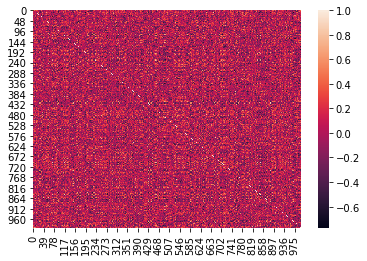

In [ ]:
dat_corr = data.corr(method = 'pearson')
print(dat_corr.head())
print(dat_corr.shape)
sns.heatmap(dat_corr)

In [ ]:
# Swap the axes - ndata will just be our normal data 
nData = data.swapaxes('index','columns')
print(nData.shape)

(1000, 316)


In [ ]:
## Let's fit a model to our data, clustering it to 10 clusters, and predicting what cluster each parcellation fits into
model = KMeans(n_clusters=10)
model.fit(dat_corr)
labels = model.predict(dat_corr)
labels.shape

(1000,)

(array([125., 103.,  90., 118.,  69.,  97., 123.,  86., 118.,  71.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

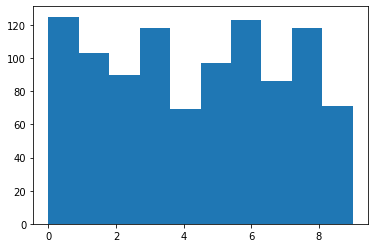

In [ ]:
# This is a histogram of the how many parcellations are assigned to each label
plt.hist(labels)

In [ ]:
labels

array([5, 6, 6, 0, 8, 7, 0, 2, 5, 5, 1, 6, 1, 4, 2, 7, 0, 0, 6, 7, 3, 3,
       5, 0, 2, 8, 8, 0, 2, 4, 6, 3, 0, 6, 9, 9, 3, 6, 1, 4, 5, 9, 7, 1,
       8, 6, 6, 7, 0, 9, 5, 3, 4, 2, 1, 7, 7, 3, 4, 9, 1, 3, 5, 6, 6, 7,
       0, 3, 6, 0, 6, 8, 4, 6, 7, 6, 7, 2, 5, 7, 4, 8, 8, 1, 6, 0, 8, 0,
       1, 1, 3, 8, 5, 2, 8, 2, 6, 8, 3, 8, 3, 9, 8, 7, 9, 7, 4, 3, 1, 4,
       4, 3, 8, 5, 1, 8, 9, 6, 6, 0, 2, 1, 0, 8, 5, 6, 2, 4, 9, 6, 8, 6,
       4, 0, 9, 9, 8, 3, 1, 2, 7, 5, 7, 0, 7, 3, 9, 2, 9, 7, 5, 2, 8, 7,
       1, 1, 2, 2, 4, 9, 5, 0, 0, 6, 3, 2, 5, 1, 6, 8, 6, 3, 9, 8, 5, 6,
       3, 5, 2, 5, 9, 8, 7, 9, 7, 6, 2, 4, 3, 0, 8, 6, 9, 5, 0, 8, 2, 3,
       5, 0, 3, 6, 4, 4, 5, 4, 1, 6, 8, 2, 7, 7, 8, 8, 6, 8, 0, 9, 7, 1,
       5, 5, 6, 2, 1, 7, 5, 3, 6, 3, 5, 4, 8, 6, 2, 3, 4, 4, 8, 7, 2, 3,
       5, 2, 3, 4, 0, 4, 3, 3, 3, 0, 0, 5, 7, 8, 6, 7, 6, 4, 0, 9, 2, 3,
       4, 2, 8, 0, 6, 5, 2, 0, 4, 3, 0, 4, 9, 8, 3, 6, 4, 1, 7, 8, 5, 6,
       2, 7, 7, 1, 9, 9, 6, 8, 2, 7, 1, 2, 2, 0, 0,

In [ ]:
#Let us now associate each of the corresponding labels to their parcellations
nData['labels'] = labels
print(nData['labels'])
nData.head()

0      5
1      6
2      6
3      0
4      8
      ..
995    0
996    1
997    0
998    1
999    0
Name: labels, Length: 1000, dtype: int32


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,labels
0,-0.022331,-0.017147,-0.007391,0.005751,0.020587,0.035035,0.046785,0.053510,0.053106,0.043968,0.025253,-0.002893,-0.039184,-0.081151,-0.125242,-0.167066,-0.201786,-0.224618,-0.231410,-0.219203,-0.186734,-0.134778,-0.066292,0.013702,0.098488,0.180273,0.250984,0.303161,0.330845,0.330353,0.300820,0.244449,0.166401,0.074335,-0.022372,-0.113632,-0.189774,-0.242655,-0.266618,-0.259172,...,0.421115,0.363526,0.270317,0.151731,0.020892,-0.107831,-0.220571,-0.305591,-0.354603,-0.363637,-0.333357,-0.268823,-0.178735,-0.074299,0.032166,0.128663,0.204857,0.253143,0.269345,0.252986,0.207129,0.137831,0.053317,-0.037031,-0.123726,-0.198146,-0.253346,-0.284609,-0.289738,-0.269063,-0.225218,-0.162725,-0.087460,-0.006071,0.074605,0.148067,0.208600,0.251626,0.273956,5
1,0.150962,0.133653,0.101733,0.060221,0.015751,-0.024355,-0.053129,-0.064959,-0.056414,-0.026795,0.021687,0.084112,0.153413,0.221234,0.278962,0.318804,0.334774,0.323451,0.284431,0.220394,0.136800,0.041247,-0.057422,-0.150149,-0.228695,-0.286546,-0.319598,-0.326517,-0.308765,-0.270290,-0.216931,-0.155628,-0.093548,-0.037233,0.008113,0.039125,0.054513,0.055005,0.043056,0.022336,...,0.344079,0.386741,0.413021,0.419375,0.403458,0.364600,0.304123,0.225439,0.133894,0.036359,-0.059399,-0.145490,-0.214731,-0.261436,-0.282054,-0.275577,-0.243665,-0.190460,-0.122124,-0.046142,0.029516,0.097262,0.150691,0.185215,0.198444,0.190300,0.162839,0.119832,0.066169,0.007178,-0.052047,-0.107212,-0.155218,-0.194334,-0.224149,-0.245319,-0.259180,-0.267283,-0.270955,6
2,-0.016996,-0.012945,-0.005123,0.005925,0.019423,0.034407,0.049798,0.064478,0.077383,0.087600,0.094460,0.097607,0.097041,0.093121,0.086522,0.078146,0.068996,0.060025,0.051982,0.045276,0.039886,0.035327,0.030695,0.024781,0.016256,0.003893,-0.013192,-0.035326,-0.062117,-0.092383,-0.124189,-0.154990,-0.181884,-0.201933,-0.212525,-0.211718,-0.198531,-0.173127,-0.136865,-0.092199,...,0.088859,0.081693,0.087522,0.105334,0.132031,0.162874,0.192143,0.213936,0.222993,0.215437,0.189332,0.145000,0.085043,0.014078,-0.061776,-0.135602,-0.200480,-0.250288,-0.280399,-0.288210,-0.273429,-0.238105,-0.186402,-0.124137,-0.058157,0.004382,0.056755,0.093346,0.110196,0.105371,0.079120,0.033816,-0.026307,-0.095591,-0.167510,-0.235303,-0.292613,-0.334077,-0.355823,6
3,0.000974,0.001093,0.001325,0.001650,0.002018,0.002332,0.002443,0.002153,0.001245,-0.000485,-0.003169,-0.006813,-0.011255,-0.016138,-0.020923,-0.024938,-0.027460,-0.027836,-0.025607,-0.020628,-0.013162,-0.003913,0.005995,0.015128,0.021902,0.024810,0.022658,0.014795,0.001295,-0.016945,-0.038216,-0.060124,-0.079824,-0.094352,-0.100997,-0.097677,-0.083267,-0.057825,-0.022669,0.019687,...,0.237039,0.256544,0.260912,0.252152,0.233327,0.208100,0.180259,0.153270,0.129901,0.111975,0.100248,0.094430,0.093340,0.095140,0.097647,0.098649,0.096205,0.088880,0.075909,0.057261,0.033610,0.006227,-0.023192,-0.052729,-0.080465,-0.104671,-0.123975,-0.137471,-0.144773,-0.146013,-0.141793,-0.133094,-0.121171,-0.107424,-0.093290,-0.080125,-0.069121,-0.061231,-0.057116,0
4,-0.080824,-0.069697,-0.048887,-0.021073,0.010218,0.041118,0.067962,0.087796,0.098765,0.100324,0.093257,0.079482,0.061696,0.042917,0.025982,0.013106,0.005547,0.003445,0.005851,0.010941,0.016370,0.019716,0.018931,0.012728,0.000839,-0.015903,-0.035661,-0.055872,-0.073648,-0.086239,-0.091491,-0.088211,-0.076397,-0.057281,-0.033186,-0.007215,0.017177,0.036663,0.048506,0.050929,...,0.289404,0.305045,0.305489,0.292338,0.268801,0.239096,0.207747,0.178867,0.155566,0.139539,0.130916,0.128361,0.129416,0.130999,0.129990,0.123789,0.110754,0.090468,0.063768,0.032562,-0.000542,-0.032723,-0.061466,-0.085020,-0.102710,-0.115067,-0.123730,-0.131155,-0.140167,-0.153443,-0.172995,-0.199759,-0.233352,-0.

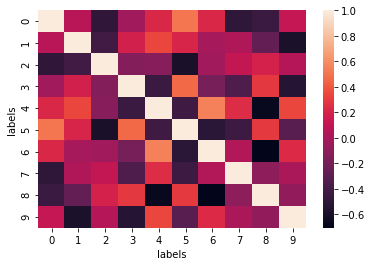

In [ ]:
# We can group each of these clustered parcellations by their means and get a mean time series of each of these clusters. 
#We can now take a correlation of these to get a rough correlation plot
result = nData.groupby('labels').aggregate('mean')
result = result.swapaxes('index', 'columns')
result.shape
sns.heatmap(result.corr())

(1000, 317)


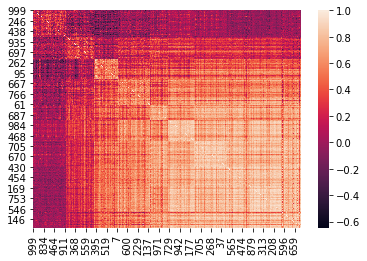

In [ ]:
#To get a whole correlation matrix that has been clustered , we sort the parcellations in the normal data and then compute a correlation amongst them
sorting = nData.sort_values('labels')
print(sorting.shape)
hData = sorting.swapaxes('index', 'columns')
clustered = hData.corr()
sns.heatmap(clustered)

In [ ]:
### Put these corresponding ones into a dataframe

df = nData
df['number'] = df.index + 1
print(df.head())
df['labels'] = df['labels'] + 1

namespace = globals()
for x in range(1, 11):
    namespace['df_%d' % x] = df[df['labels'] == x]

df_10 = df[df['labels'] == 10]
print(df_10.shape)
print(np.unique(df['labels']))

          0         1         2         3  ...       314       315  labels  number
0 -0.022331 -0.017147 -0.007391  0.005751  ...  0.251626  0.273956       5       1
1  0.150962  0.133653  0.101733  0.060221  ... -0.267283 -0.270955       6       2
2 -0.016996 -0.012945 -0.005123  0.005925  ... -0.334077 -0.355823       6       3
3  0.000974  0.001093  0.001325  0.001650  ... -0.061231 -0.057116       0       4
4 -0.080824 -0.069697 -0.048887 -0.021073  ... -0.411390 -0.424643       8       5

[5 rows x 318 columns]
(71, 318)
[ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
namespace = globals()
for x in range(1, 11):
    namespace['label_%d' % x] = list(eval('df_'+str(x))['number'])


In [ ]:
import csv


with open('Clustered_Craddock.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(label_1)
    writer.writerow(label_2)
    writer.writerow(label_3)
    writer.writerow(label_4)
    writer.writerow(label_5)
    writer.writerow(label_6)
    writer.writerow(label_7)
    writer.writerow(label_8)
    writer.writerow(label_9)
    writer.writerow(label_10)